In [2]:
import matplotlib.pyplot as plt
import Data
# read the criterias from file.
geology_layer = Data.Read_data('Geology.txt').read()
tansport_layer = Data.Read_data('Transport.txt').read()
population_layer = Data.Read_data('Pop.txt').read()

# weights 20% 50% and 30%

geology_weight = 0.2
Transport_weight = 0.5
transport_weight = 0.3


#  create  a new list to store the new pixel values
weighted_layer = []

#  check if the layers have the same length
length = len(geology_layer)

if all(len(lst) == length for lst in [geology_layer, tansport_layer, population_layer]):
    print(True)

def compute_weighed_overlay(geo_data,trans_data,pop_data):
    weighted_layer = []
    for i in range(len(geo_data)):
        row = []
        for j in range(len(geo_data[0])):
            row.append(geo_data[i][j] *0.5 + trans_data[i][j]*0.2 + pop_data[i][j]*0.3)
        weighted_layer.append(row)
#     print(weighted_layer)
    return weighted_layer
weighted_overlay_layer = compute_weighed_overlay(geology_layer,tansport_layer,population_layer)


Processed 530 lines from txt file.
Processed 530 lines from txt file.
Processed 530 lines from txt file.
True


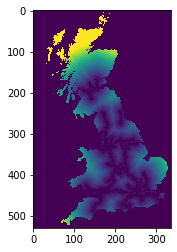

In [3]:
# plot other map layers 
# transport  layer
plt.imshow(tansport_layer)
plt.show()

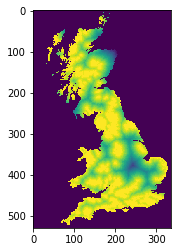

In [4]:
# geology layer
plt.imshow(geology_layer)
plt.show()

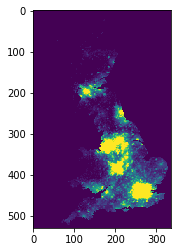

In [5]:
# population layer
plt.imshow(population_layer)
plt.show()

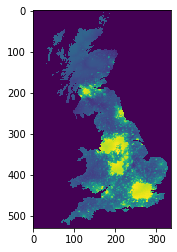

In [6]:
# weighed overlay
plt.imshow(weighted_overlay_layer)
plt.show()